# 图像特效-高斯滤波

In [15]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [16]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [17]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)
rows,cols = gray.shape
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255

src_noise = np.zeros(src.shape,dtype=np.float64)
src_noise[:,:,0] = np.float64(src[:,:,0]) + noise * 255
src_noise[:,:,1] = np.float64(src[:,:,1]) + noise * 255
src_noise[:,:,2] = np.float64(src[:,:,2]) + noise * 255

src_noise[src_noise < 0] = 0
src_noise[src_noise > 255] = 255
src_noise = src_noise.astype(np.uint8)

In [18]:
def gen_gaussian_kernel(ksize,sigma=2.4):
    center = (ksize - 1) // 2
    kernel = np.zeros((ksize,ksize),dtype=np.float32)
    for i in range(ksize):
        for j in range(ksize):
            dis = np.abs(i - center) + np.abs(j-center) # 用和来近似平方的开方
            dvalue = np.exp(-dis * dis / (2 * sigma * sigma + 1.0e-5))
            kernel[i,j] = dvalue
    dsum = np.sum(kernel)
    kernel /= (dsum + 1.0e-5)
    return kernel

In [23]:
def gaussian_filter(im,ksize=3,sigma=2.4):
    dst = np.zeros_like(im).astype(np.float32)
    srcf = im.astype(np.float32)
    kernel = gen_gaussian_kernel(ksize,sigma)
    if len(im.shape) > 2:
        dst[:,:,0] = signal.convolve2d(srcf[:,:,0],kernel, boundary='symm', mode='same')
        dst[:,:,1] = signal.convolve2d(srcf[:,:,1],kernel, boundary='symm', mode='same')
        dst[:,:,2] = signal.convolve2d(srcf[:,:,2],kernel, boundary='symm', mode='same')
    else:
        dst = signal.convolve2d(srcf,kernel, boundary='symm', mode='same')
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    return dst.astype(np.uint8)

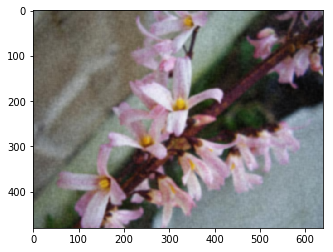

In [28]:
dst = gaussian_filter(src_noise,11,2.5)
plt.imshow(dst,'gray')

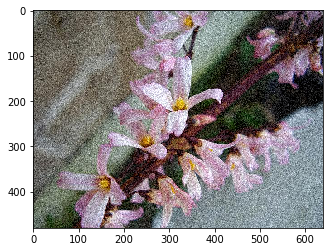

In [27]:
plt.imshow(src_noise,'gray')